# Ejercicio cuestionario

## En el siguiente link encontrará un conjunto de datos conformado por 24 diagnósticos de uso de lentes de contactos: http://archive.ics.uci.edu/ml/datasets/Lenses. Los atributos son:
## ID : nro. de registro (valor correlativo entre 1 y 24)
## Edad del paciente: 1= joven; 2 = pre-presbicia; 3 = presbicia (o vista cansada)
## Expectativa de prescripción: 1=miopía; 2=hipermetropía
## Astigmatismo : 1= no; 2= si
## Producción de lágrimas: 1=reducida; 2=normal

## Diagnóstico:
## el paciente debería utilizar lentes de contacto duros (1) .
## el paciente debería utilizar lentes de contacto blandos (2) .
## el paciente no debería utilizar lentes de contacto (3) .

### Indique si es posible entrenar, utilizando los 24 ejemplos, un perceptrón capaz de separar los casos que deben utilizar lentes blandos (Diagnóstico=2) del resto.



In [73]:

 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [75]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

In [77]:

import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'lenses.data' # archivo de semillas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
print(df)
#display(df)


    1  1  1  1  1  3
0   2  1  1  1  2  2
1   3  1  1  2  1  3
2   4  1  1  2  2  1
3   5  1  2  1  1  3
4   6  1  2  1  2  2
5   7  1  2  2  1  3
6   8  1  2  2  2  1
7   9  2  1  1  1  3
8   10 2  1  1  2  2
9   11 2  1  2  1  3
10  12 2  1  2  2  1
11  13 2  2  1  1  3
12  14 2  2  1  2  2
13  15 2  2  2  1  3
14  16 2  2  2  2  3
15  17 3  1  1  1  3
16  18 3  1  1  2  3
17  19 3  1  2  1  3
18  20 3  1  2  2  1
19  21 3  2  1  1  3
20  22 3  2  1  2  2
21  23 3  2  2  1  3
22  24 3  2  2  2  3


In [87]:
# vuelvo a crear el dataframe porque me da error en el anterior y le quiero agregar nombre a las columnas:
data = {
    0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    1: [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    2: [1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2],
    3: [1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    4: [1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    5: [3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3]
}

df1 = pd.DataFrame(data)

# Asignar nombres a las columnas
df1.columns = ['ID', 'edad', 'expectativa', 'astigmatismo', 'lagrimas', 'diagnostico']

print(df1)

    ID  edad  expectativa  astigmatismo  lagrimas  diagnostico
0    1     1            1             1         1            3
1    2     1            1             1         1            2
2    3     1            1             2         2            3
3    4     1            1             2         2            1
4    5     1            2             1         1            3
5    6     1            2             2         2            2
6    7     2            1             1         1            3
7    8     2            1             1         2            2
8    9     2            1             2         1            3
9   10     2            1             2         2            1
10  11     2            2             1         1            3
11  12     2            2             1         2            2
12  13     3            1             2         1            3
13  14     3            1             2         2            3
14  15     3            2             1         1      

In [89]:
# aplico NORMALIZACION LINEAL UNIFORME  a todas las columnas
# -- Escala los valores entre 0 y 1 --

min1 = df1['edad'].min()
max1 = df1['edad'].max()
df1['edad']= (df1['edad']-min1)/(max1-min1)

min2 = df1['expectativa'].min()
max2 = df1['expectativa'].max()
df1['expectativa']= (df1['expectativa']-min2)/(max2-min2)

min3 = df1['astigmatismo'].min()
max3 = df1['astigmatismo'].max()
df1['astigmatismo']= (df1['astigmatismo']-min3)/(max3-min3)

min4 = df1['lagrimas'].min()
max4 = df1['lagrimas'].max()
df1['lagrimas']= (df1['lagrimas']-min4)/(max4-min4)

min5 = df1['diagnostico'].min()
max5 = df1['diagnostico'].max()
df1['diagnostico']= (df1['diagnostico']-min5)/(max5-min5)


In [91]:
# elimino columna ID (porque no aporta datos a la prediccion)

df1 = df1.drop('ID', axis=1)
print(df1)

    edad  expectativa  astigmatismo  lagrimas  diagnostico
0    0.0          0.0           0.0       0.0          1.0
1    0.0          0.0           0.0       0.0          0.5
2    0.0          0.0           1.0       1.0          1.0
3    0.0          0.0           1.0       1.0          0.0
4    0.0          1.0           0.0       0.0          1.0
5    0.0          1.0           1.0       1.0          0.5
6    0.5          0.0           0.0       0.0          1.0
7    0.5          0.0           0.0       1.0          0.5
8    0.5          0.0           1.0       0.0          1.0
9    0.5          0.0           1.0       1.0          0.0
10   0.5          1.0           0.0       0.0          1.0
11   0.5          1.0           0.0       1.0          0.5
12   1.0          0.0           1.0       0.0          1.0
13   1.0          0.0           1.0       1.0          1.0
14   1.0          1.0           0.0       0.0          1.0
15   1.0          1.0           1.0       1.0          1

# entrenamiento de perceptron

In [94]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df1.iloc[:,:-1])   # X contiene todas las columnas menos la columna 'Clase' --> variables de entrada
T = np.array((df1['lentes-blandos'] == '0.5') * 1)  # T es la variable objetivo que se intenta predecir. se está transformando la columna Clase en un array 
                                           # binario donde 1 indica que el tipo de semilla es Tipo2 y 0 indica que es cualquier otro tipo. 
                                           # Esto se hace para poder predecir si la semilla es de Tipo2 o no.
nColum = ['lentes-blandos', '0.5']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

#normalizarEntrada = 1  # 1 si normaliza; 0 si no                   #se normalizan los datos
#if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
 #   normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
   # X_train = normalizador.fit_transform(X_train)
   # X_test  = normalizador.transform(X_test)

KeyError: 'lentes-blandos'

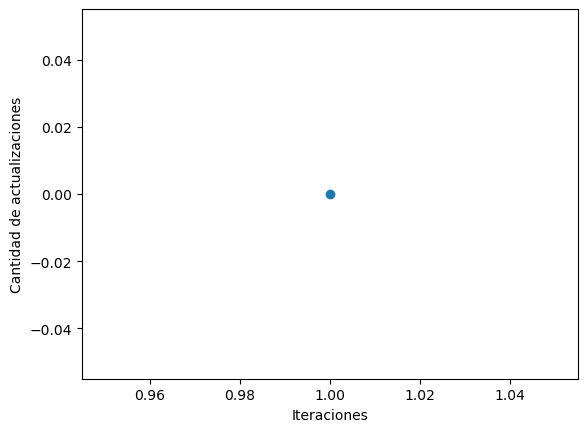

In [96]:
ppn = Perceptron(alpha=0.05, n_iter=100, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [98]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  6
% de aciertos = 75.00 %
